# Diamons Prices Previsions
* Dataset: Diamonds Prices
* Dataset Source: https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices
* Dataset Description: This dataset contains the prices and other attributes of almost 54,000 diamonds.
* Dataset size: 53,940 rows, 10 columns

## Dataset Description
 * Number of Features: 10
 * Features: carat, cut, color, clarity, depth, table, price, x, y, z
 * Price of the diamonds are in US dollars (\$326–\$18,823)
 * x (lenght), y (width), z (depth) are the dimensions of the diamonds in mm
 * clarity:

# Objectives of the project
* Analyze the dataset
* Clean the dataset
* Predict the price of the diamonds
* Classify the cut of the diamonds
* Classify the color of the diamonds
* Classify the clarity of the diamonds

# Diamonds Information

## Diamonds Carat
* The carat of the diamonds is the unit of measurement for the weight of the diamonds.
* The carat of the diamonds is divided into 100 points. (1 carat = 100 points)
* The carat of the diamonds is the most important factor in determining the price of the diamonds.

![Diamond carat](diamonds-carat.png)

## Diamonds Cut
* Diamonds are cut into different shapes like: round, heart and oval. But in the dataset are contained only the price and information of diamonds cut in round shape. 
* This means tha from this dataset we can only create a models that works with round diamonds. 
* In this dataset the cut of the diamonds is classified in 5 different categories of quality: <b>Ideal</b>, <b>Premium</b>, <b>Very Good</b>, <b>Good</b> and <b>Fair</b>.

![Diamond round cut](diamond-round-cut.jpg)

## Diamonds Color
* Diamonds are classified in 7 different colors:  (best) <b>D</b>, <b>E</b>, <b>F</b>, <b>G</b>, <b>H</b>, <b>I</b> and <b>J</b> (worst).
* The color of the diamonds is determined by the absence of color in the diamonds. The more colorless the diamond is, the higher the price.
* So we can tell that the diamonds with color <b>D</b> are more clear than the diamonds with color <b>J</b>.

![Diamond colors](diamond-colors.jpg)

## Diamonds Clarity
* Diamonds are classified in 8 different clarity:  (best) <b>IF</b>, <b>VVS1</b>, <b>VVS2</b>, <b>VS1</b>, <b>VS2</b>, <b>SI1</b>, <b>SI2</b> and <b>I1</b> (worst).
* The clarity of the diamonds is determined by the presence of inclusions and blemishes in the diamonds. The more inclusions and blemishes the diamond has, the lower the price.
* Blemishes are the surface defects of the diamonds. Inclusions are the internal defects of the diamonds.
* So we can tell that the diamonds with clarity <b>IF</b> are more clear or with less difects than the diamonds with clarity <b>I1</b>.

![Diamond clarity](diamond-clarity.jpeg)

## Diamonds depth, table and carat
* The depth of the diamonds is the height of the diamond, measured from the culet to the table, divided by its average girdle diameter.
* The table of the diamonds is the width of the diamond's table expressed as a percentage of its average diameter.

![Diamond clarity](diamond-depth.png)






# Features Description
* carat: weight of the diamond (0.2–5.01)
* cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color: diamond colour, from J (worst) to D (best)
* clarity: how traslucent is the diamond (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79)
* table: width of top of diamond relative to widest point (43–95)
* price: price in US dollars (\$326 – \$18,823)
* x: length in mm (0–10.74)
* y: width in mm (0–58.9)
* z: depth in mm (0–31.8)

# Install Dependencies

In [140]:
! pip3 install numpy
! pip3 install pandas
! pip3 install matplotlib
! pip3 install seaborn
! pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Imports

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

import seaborn as sns 
sns.set_style('white')
sns.set_context('notebook')

# Analyze and Clean the dataset

In [142]:
%matplotlib inline

df = pd.read_csv("Diamonds Prices2022.csv")
df.sample(10)

Unnamed: 0  carat        cut color clarity  depth  table  price     x   
44253       44254   0.51       Good     D     SI1   63.6   57.0   1574  5.08  \
8597         8598   0.90  Very Good     F     SI2   61.0   61.0   4441  6.14   
4508         4509   0.91       Good     E     SI2   64.3   57.0   3632  6.00   
9645         9646   1.01      Ideal     I     SI1   60.3   58.0   4641  6.50   
39397       39398   0.41      Ideal     G    VVS2   61.0   57.0   1076  4.80   
28182       28183   0.37      Ideal     I     VS2   61.7   57.0    666  4.64   
28704       28705   0.41  Very Good     I     SI1   63.3   60.0    680  4.71   
47077       47078   0.52      Ideal     D     VS2   61.8   57.0   1822  5.16   
5719         5720   0.25  Very Good     E    VVS2   63.0   57.0    575  4.00   
47880       47881   0.58      Ideal     G     VS1   61.8   55.0   1911  5.35   

          y     z  
44253  5.05  3.22  
8597   6.18  3.76  
4508   6.04  3.87  
9645   6.56  3.94  
39397  4.78  2.92  
28182  4.60  2.85  
28704  4.64  2.96  
47077  5.20  3.20  
5719   4.06  2.54  
47880  5.39  3.32

There are some NaN values in the dataset.

In [143]:
# count the numbers of NaN values in each column
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Because the null values are in a column that have no meaning or relations to the other columns, we can drop this column.

In [144]:
# drop first column (unnamed)
df = df.drop(df.columns[0], axis=1)
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [145]:
# check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Before viewing the correlation between the features, we need to convert the categorical features in numerical features. <br>
Like this:
* cut --> 1 (ideal), 2 (premium), 3 (very good), 4 (good), 5 (fair)
* color --> 1 (D), 2 (E), 3 (F), 4 (G), 5 (H), 6 (I), 7 (J)
* clarity --> 1 (IF), 2 (VVS1), 3 (VVS2), 4 (VS1), 5 (VS2), 6 (SI1), 7 (SI2), 8 (I1)

so less is the value of this features, more is the quality of the diamonds ==> better is the price of the diamonds, but how much?

In [146]:
# convert categorical data to numerical data
cutMap = {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}
colorMap = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7}
clarityMap = {'IF': 1, 'VVS1': 2, 'VVS2': 3, 'VS1': 4, 'VS2': 5, 'SI1': 6, 'SI2': 7, 'I1': 8}

df['cut'] = df['cut'].map(cutMap)
df['color'] = df['color'].map(colorMap)
df['clarity'] = df['clarity'].map(clarityMap)

df.head()

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    5      2        7   61.5   55.0    326  3.95  3.98  2.43
1   0.21    4      2        6   59.8   61.0    326  3.89  3.84  2.31
2   0.23    2      2        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    4      6        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    2      7        7   63.3   58.0    335  4.34  4.35  2.75

<Axes: >

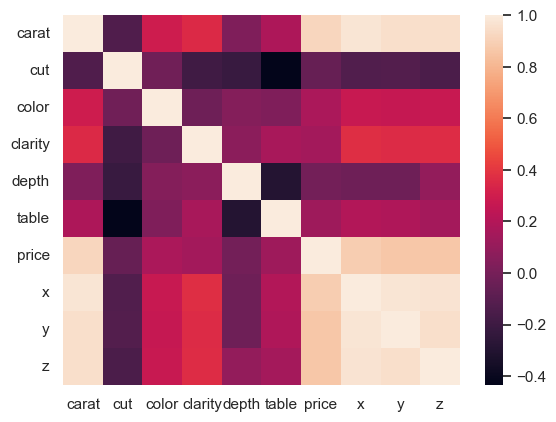

In [147]:
# heatmap that shows the correlation between the different features
sns.heatmap(df.corr())

* We can see that the table and depth columns have a lot of correlation between them, and with the other columns too. This means that we can drop one of the two columns.
* The correlation between Table and Depth is so high because are besed both on the same value: the width/diameter of the diamond. 
* This could explain also why the dimension of the diamonds are somehow correlated with the table and depth columns.
* Now i want to see the distrubuation of the table and depth columns, like this i can see the relation between the two columns

Text(0.5, 0, 'Table')

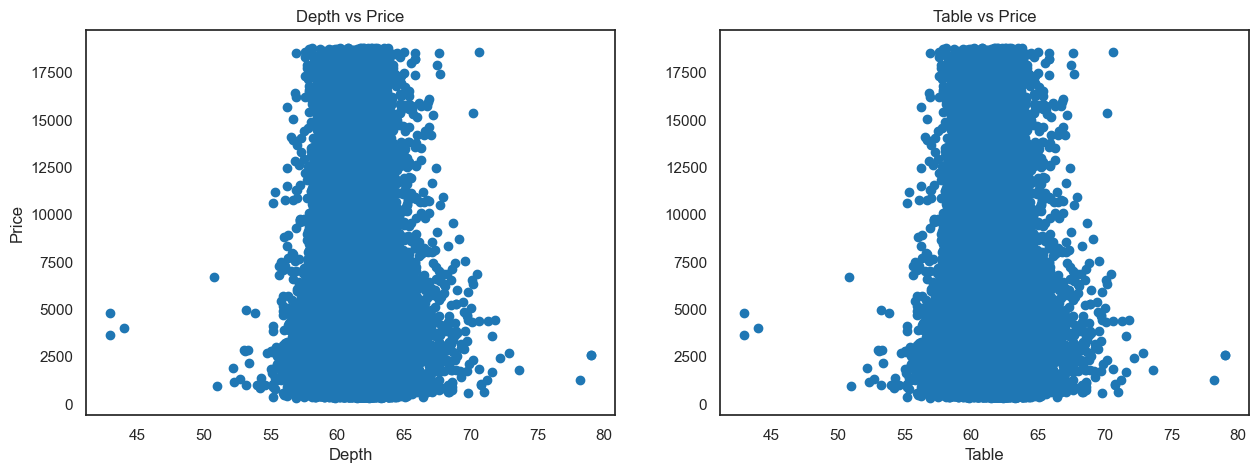

In [148]:

# 2 side by side plots of price vs depth for both price vs table
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

axis1.scatter(df['depth'], df['price'])
axis1.set_title('Depth vs Price')
axis1.set_xlabel('Depth')
axis1.set_ylabel('Price')

axis2.scatter(df['depth'], df['price'])
axis2.set_title('Table vs Price')
axis2.set_xlabel('Table')

#### Correlation between the table and depth columns
* from the graph we can see that the table and depth columns are almost the same, so we can drop one of the two columns.

#### Price Prediction 
* we can see that from only depth or table we can't predict the price of the diamonds,
* because i think the price is highly correlated with the carat and "quality" (clarity, cut, color) of the diamonds.
* so in the and we can drop the depth and table columns.

In [149]:
#drop depth and table columns
dfCleaned = df.drop(['depth', 'table'], axis=1)
dfCleaned.head()

carat  cut  color  clarity  price     x     y     z
0   0.23    5      2        7    326  3.95  3.98  2.43
1   0.21    4      2        6    326  3.89  3.84  2.31
2   0.23    2      2        4    327  4.05  4.07  2.31
3   0.29    4      6        5    334  4.20  4.23  2.63
4   0.31    2      7        7    335  4.34  4.35  2.75

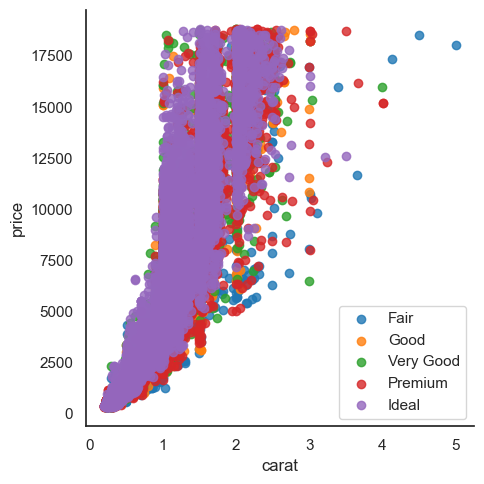

In [150]:
#custom legend for cut column
cutLegend = {1: 'Fair', 2: 'Good', 3: 'Very Good', 4: 'Premium', 5: 'Ideal'}

# plot carat vs price, with cut hue and custom cutLegend
sns.lmplot(x='carat', y='price', data=dfCleaned, hue='cut', fit_reg=False, legend=False)
plt.legend(cutLegend.values())



#### Price Prediction
* This tell that only from the carat we can predict the price of the diamonds with a good accuracy.
* But we can also see that the price of the diamonds is not linear, so we can try to use a polynomial regression model.

#### Cut Influence on the Price

* The type of cut influence the price of the diamonds, but is not the only factor because we can see the same price for different cut types,
* this is obvious because the price of the diamonds is influenced by other factors like the carat, color, clarity, etc.

Text(0.5, 0, 'z')

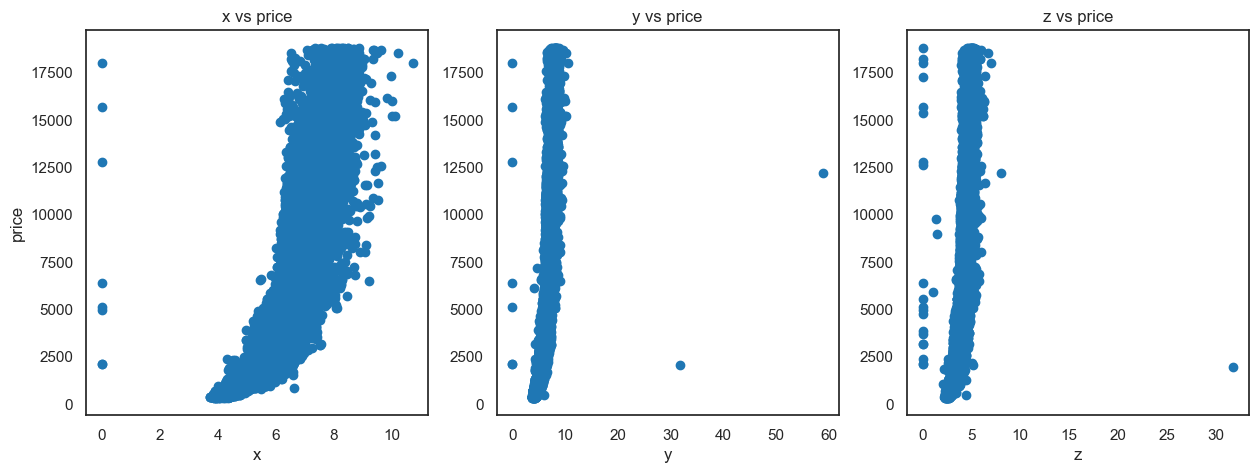

In [151]:
# put 3 scatter plot aside each other, for x and y and z in relation to the price
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(dfCleaned['x'], dfCleaned['price'], picker=True)
ax1.set_title('x vs price')
ax1.set_xlabel('x')
ax1.set_ylabel('price')

ax2.scatter(dfCleaned['y'], dfCleaned['price'])
ax2.set_title('y vs price')
ax2.set_xlabel('y')

ax3.scatter(dfCleaned['z'], dfCleaned['price'])
ax3.set_title('z vs price')
ax3.set_xlabel('z')


# Dataset Column Adjustments

In [152]:
# convert coulmns to binary values using get_dummies
dfAdjusted = pd.get_dummies(dfCleaned, columns=['cut', 'color', 'clarity'])
dfAdjusted.head()

carat  price     x     y     z  cut_1  cut_2  cut_3  cut_4  cut_5  ...   
0   0.23    326  3.95  3.98  2.43  False  False  False  False   True  ...  \
1   0.21    326  3.89  3.84  2.31  False  False  False   True  False  ...   
2   0.23    327  4.05  4.07  2.31  False   True  False  False  False  ...   
3   0.29    334  4.20  4.23  2.63  False  False  False   True  False  ...   
4   0.31    335  4.34  4.35  2.75  False   True  False  False  False  ...   

   color_6  color_7  clarity_1  clarity_2  clarity_3  clarity_4  clarity_5   
0    False    False      False      False      False      False      False  \
1    False    False      False      False      False      False      False   
2    False    False      False      False      False       True      False   
3     True    False      False      False      False      False       True   
4    False     True      False      False      False      False      False   

   clarity_6  clarity_7  clarity_8  
0      False       True      False  
1       True      False      False  
2      False      False      False  
3      False      False      False  
4      False       True      False  

[5 rows x 25 columns]

# Dataset Splitting

In [153]:
# split the data into training and testing sets
X = dfAdjusted.drop('price', axis=1)
y = dfAdjusted['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardization

In [15]:
# standardize the data
scaler = preprocessing.StandardScaler().fit(X_train)

# transform the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create dataframe from the scaled data
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Regression

## Polynomial Regression
* We can see that the polynomial regression model is better than the linear regression model, but we can try to improve the model.
* We can try to use a polynomial regression model with more degree.
* But when test it took to much time to train the model.

In [ ]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 8)
X_poly = poly_reg.fit_transform(X_train_scaled)
poly_reg.fit(X_poly, y_train)


# Predicting a new result with Polynomial Regression
y_pred = poly_reg.fit_transform(X_test_scaled)

#print accuracy of the model
print(classification_report(y_test, y_pred))


## Logical Regression
* We can see that the logical regression model is not so good, because the accuracy is not so high.
* This is because the logical regression model is not suitable for this dataset, because the price of the diamonds is not linear.
* It takes to many time to train the model, so we can try to use a different model.

In [ ]:
# Logistic Regression
logreg = LogisticRegression(solver='sag', max_iter=1)
logreg.fit(X_train_scaled, y_train)

# Predicting a new result with Logistic Regression
y_pred = logreg.predict(X_test_scaled)

#print accuracy of the model
print(classification_report(y_test, y_pred))

## Ridge Regression
* linear regression with regularization
* Used when the dataset have many features (high-dimensional dataset)
* and used for avoiding to take in consideration columns that are not important for the prediction
* Used to improve interpretability of featues in correlation with the target
* the penality ('punizione') is the coefficient of the regularization term
* the penality is necessary to avoid overfitting
* the penality garantee that the model is not too complex, and so it can generalize better

### Ridge Regression with SAGA Solver

In [79]:
# Ridge regression
from sklearn.linear_model import Ridge

# SAG is a stochastic optimization algorithm that is particularly useful for large-scale linear regression problems.
# SAGA is a variant of SAG that also supports the non-smooth penalty=l1
#ridgeReg = Ridge(alpha=0.05, solver='sag')
ridgeReg = Ridge(alpha=0.05, solver='saga')
ridgeReg.fit(X_train_scaled, y_train)

# Predicting a new result with Ridge Regression
y_pred = ridgeReg.predict(X_test_scaled)

#print accuracy of the model
print(ridgeReg.score(X_test_scaled, y_test))

0.9224254985330282


* with this model we can see that the accuracy is high.

### Ridge regression with GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# parameters that we want to tune
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 30, 50, 70, 100, 150, 200, 300, 500, 700, 1000, 1500, 2000]

ridge = Ridge()

parameters = {'alpha': alpha}

# GridSearchCV will try all the combinations of the parameters
ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X_train_scaled, y_train)

print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)

{'alpha': 20}
1295574.3904235393


In [78]:
ridge = Ridge(alpha=ridge_regressor.best_params_['alpha'])
ridge.fit(X_train_scaled, y_train)

# Predicting a new result with Ridge Regression
y_pred = ridge.predict(X_test_scaled)

#print accuracy of the model
print(ridge.score(X_test_scaled, y_test))

0.922375573729045


* with this model we can see that the accuracy is high.

## Lasso Regression

In [35]:
#Lasso regression
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.6)
lassoReg.fit(X_train_scaled, y_train)

# Predicting a new result with Lasso Regression
y_pred = lassoReg.predict(X_test_scaled)

#print accuracy of the model
print(lassoReg.score(X_test_scaled, y_test))

0.9223987609445108


### Lasso Regression with only x, y, z

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# modify train and test data, with only x,y,z
X_train = X_train_scaled[['x', 'y', 'z']]
X_test = X_test_scaled[['x', 'y', 'z']]

# parameters that we want to tune
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 0.6, 1, 5, 10, 20, 30, 50, 70, 100, 150, 200, 300, 500, 700, 1000, 1500, 2000]

In [83]:
lassoReg = Lasso(alpha=0.6)
lassoReg.fit(X_train, y_train)

# Predicting a new result with Lasso Regression
y_pred = lassoReg.predict(X_test)

#print accuracy of the model
print(lassoReg.score(X_test, y_test))

0.7804924706294081


In [85]:
lasso = Lasso()

parameters = {'alpha': alpha}

# GridSearchCV will try all the combinations of the parameters
lasso_regressor = GridSearchCV(lasso, parameters,scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(X_train, y_train)

print(lasso_regressor.best_params_)
print(-lasso_regressor.best_score_)

lasso = Lasso(alpha=lasso_regressor.best_params_['alpha'])
lasso.fit(X_train, y_train)

# Predicting a new result with Lasso Regression
y_pred = lasso.predict(X_test)

#print accuracy of the model
print(lasso.score(X_test, y_test))

/Users/petercatania/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.984e+10, tolerance: 5.507e+07
  model = cd_fast.enet_coordinate_descent(
/Users/petercatania/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.878e+10, tolerance: 5.427e+07
  model = cd_fast.enet_coordinate_descent(
/Users/petercatania/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

{'alpha': 50}
3462425.630456732
0.7803486557847755


* we can see that with lasso and using only the x,y,z it is possible tu obtain a fair accuracy.
* it is possible only with x or carat ?

## SGD Regression
* SGD = Stochastic Gradient Descent
* simple and efficent optimization
* used for large datasets with millions of features
* used for training large-scale machine learning models

In [24]:
#importing the SGD Regressor
from sklearn.linear_model import SGDRegressor

# Fitting SGD Regressor to the Training set
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train_scaled, y_train)

# Predicting a new result with SGD Regressor
y_pred = sgd_reg.predict(X_test_scaled)

#accuracy of the model SGD Regressor
print(sgd_reg.score(X_test_scaled, y_test))


0.9218863289375109


* with this model we can see that the accuracy is high.

### SGD Regression with only x

In [ ]:
# modify train and test data, with only x,y,z
X_train = X_train_scaled[['x']]
X_test = X_test_scaled[['x']]

In [86]:
# Fitting SGD Regressor to the Training set
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train)

# Predicting a new result with SGD Regressor
y_pred = sgd_reg.predict(X_test)

#accuracy of the model SGD Regressor
print(sgd_reg.score(X_test, y_test))

0.7790307652055642


### SGD Regression with only Carat

In [ ]:
# modify train and test data, with only x,y,z
X_train = X_train_scaled[['carat']]
X_test = X_test_scaled[['carat']]

In [87]:
# Fitting SGD Regressor to the Training set
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train)

# Predicting a new result with SGD Regressor
y_pred = sgd_reg.predict(X_test)

#accuracy of the model SGD Regressor
print(sgd_reg.score(X_test, y_test))

0.7805163504962933


We Can see that the accuracy obtained train only with x or carat is fair, but obviusly is not the best model.

## Decision Tree Regression

In [90]:
# Decision Tree
# Descision tree is a non-parametric supervised learning method used for classification and regression.
# is
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(X_train_scaled, y_train)

# Predicting a new result with Decision Tree
y_pred = dtree.predict(X_test_scaled)

#print accuracy of the model
print(dtree.score(X_test_scaled, y_test))

0.9649467463950754


* with this model we can see that the accuracy is very high.

In [89]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(X_train_scaled, y_train)

# Predicting a new result with Random Forest Regression
y_pred = rfr.predict(X_test_scaled)

#print accuracy of the model
print(rfr.score(X_test_scaled, y_test))

0.9784884722052908


In [ ]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(X_train_scaled, y_train)

# Predicting a new result with Random Forest Regression
y_pred = rfr.predict(X_test_scaled)

#print accuracy of the model
print(rfr.score(X_test_scaled, y_test))

0.9784884722052908


* with this model we can see that the accuracy is very high.

## Support Vector Regression

In [92]:
# Support Vector Machine model
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Predicting a new result with Support Vector Machine
y_pred = svr_model.predict(X_test_scaled)

#print accuracy of the model
print(svr_model.score(X_test_scaled, y_test))

0.36438475571860673


* from this regression model we can see that the accuracy is really bad

#### Price Prediction
* from the above plots we can see that the price is some what correlated with the carat, x, y and z features
* so we can try to predict the price of the diamonds using only this features or even better with also this features.

# Classification

## Prepare Data

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the dataset into the Training set and Test set
X = dfCleaned.drop('color', axis=1)
y = dfCleaned['color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Feature Scaling
sc = StandardScaler()

# transform the data
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# create dataframe from the scaled data
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)  
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Color Classification

### KNN Classification
* Accurancy: 0.43

In [21]:
# KNN model for classification of the color
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predicting a new result with KNN
y_pred = knn.predict(X_test_scaled)

#print accuracy of the model
print('KNN Classification Accurancy: ',knn.score(X_test_scaled, y_test))



KNN Classification Accurancy:  0.4326628973954954


### Best KNN CLASSIFICATION
* Accurancy: 0.45

In [22]:
error = []

# KNeighborsClassifier works well with not to much feautures, up to 4 or 5 works really well
# Calculating error for K values between 1 and 40
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test)) # calculate mean error


Text(0, 0.5, 'Mean Error')

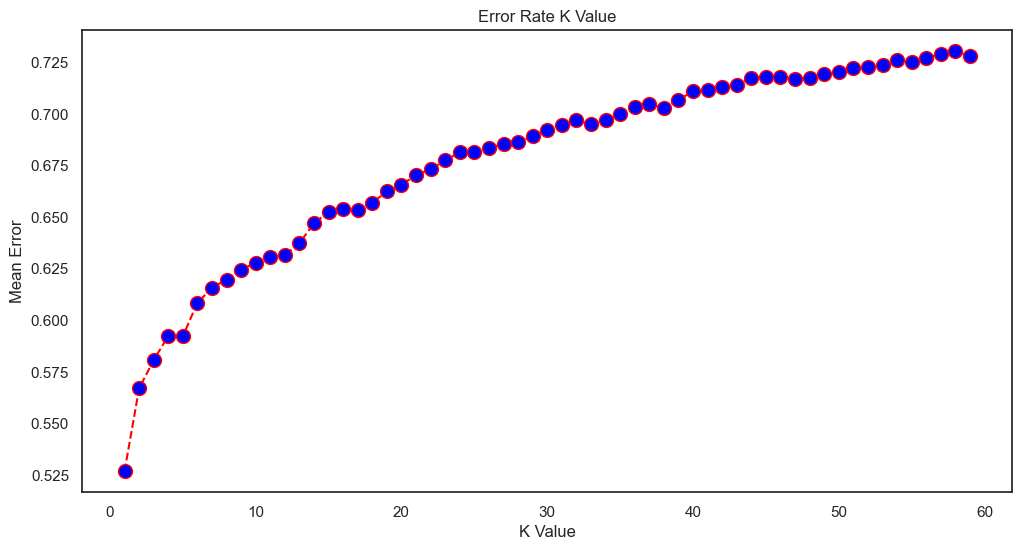

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 60), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [24]:
# KNN model for classification of the color
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

# Predicting a new result with KNN
y_pred = knn.predict(X_test_scaled)

#print accuracy of the model
print('KNN Classification Accurancy: ',knn.score(X_test_scaled, y_test))

KNN Classification Accurancy:  0.44758550375382333


### SVM Classification
* Accurancy: 0.38

In [25]:
# SVM model for classification of the color
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

# Predicting a new result with SVM
y_pred = svc_model.predict(X_test_scaled)

#print accuracy of the model
print('SVM Classification Accurancy: ',svc_model.score(X_test_scaled, y_test))


SVM Classification Accurancy:  0.3821484845676152


In [26]:
# best SUPPORT VECTOR MACHINE
from sklearn.svm import SVC

svc_model = SVC(C=1, gamma=0.1)
svc_model.fit(X_train_scaled, y_train)

# Predicting a new result with SVM
y_pred = svc_model.predict(X_test_scaled)

#print accuracy of the model
print('SVM Classification Accurancy: ',svc_model.score(X_test_scaled, y_test))

SVM Classification Accurancy:  0.3745481508944295


### Decision Tree Classification
* Accurancy: 0.51

In [32]:
# Decision Tree
# Descision tree is a non-parametric supervised learning method used for classification and regression.
# is
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train_scaled, y_train)

# Predicting a new result with Decision Tree
y_pred = dtree.predict(X_test_scaled)

#print accuracy of the model
print('Decision Tree Classification Accurancy: ',dtree.score(X_test_scaled, y_test))

Decision Tree Classification Accurancy:  0.5130225229400315


### Random Forest Classification
* Accurancy: 0.56

In [155]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_scaled, y_train)

# Predicting a new result with Random Forest
y_pred = rfc.predict(X_test_scaled)

#print accuracy of the model
print('Random Forest Classification Accurancy: ',rfc.score(X_test_scaled, y_test))


Random Forest Classification Accurancy:  0.5575122810269719


<Axes: >

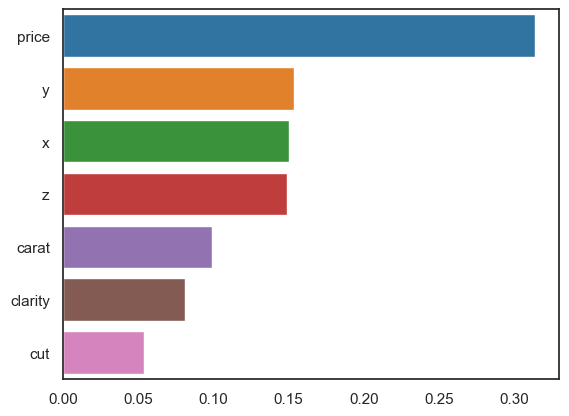

In [156]:
# importance of the features in the Random Forest model
feature_imp = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

In [157]:
X = X_train_scaled.drop(['carat','clarity','cut'], axis=1)
X_test = X_test_scaled.drop(['carat','clarity','cut'], axis=1)

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X, y_train)

# Predicting a new result with Random Forest
y_pred = rfc.predict(X_test)

#print accuracy of the model
print('Random Forest Classification Accurancy: ',rfc.score(X_test, y_test))

Random Forest Classification Accurancy:  0.3536935767911762


* we can say that all features are important to predict the color of the diamonds

In [173]:
# add volume of the diamond V = (4/3) x π x (r1 x r2 x r3)
dfCleaned['volume'] = (4/3) * np.pi * (dfCleaned['x'] * dfCleaned['y'] * dfCleaned['z'])

# add density of the diamond
dfCleaned['density'] = dfCleaned['carat'] / dfCleaned['volume']

# add price per carat
dfCleaned['price_per_carat'] = dfCleaned['price'] / dfCleaned['carat']

# add price per volume
dfCleaned['price_per_volume'] = dfCleaned['price'] / dfCleaned['volume']

# Splitting the dataset into the Training set and Test set
X = dfCleaned.drop('color', axis=1)
y = dfCleaned['color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Feature Scaling
sc = StandardScaler()

# Drop the new columns before scaling
X_train = X_train.drop(['density', 'price_per_volume'], axis=1)
X_test = X_test.drop(['density', 'price_per_volume'], axis=1)

# transform the data
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# create dataframe from the scaled data
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


KeyError: "None of [Index(['density', 'price_per_volume'], dtype='object')] are in the [columns]"

In [174]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

# Predicting a new result with Random Forest
y_pred = rfc.predict(X_test)

#print accuracy of the model
print('Random Forest Classification Accurancy: ',rfc.score(X_test, y_test))

Random Forest Classification Accurancy:  0.6240615441653536


# Clustering

##  See correlation between the features, in relation with the color, clarity and cut

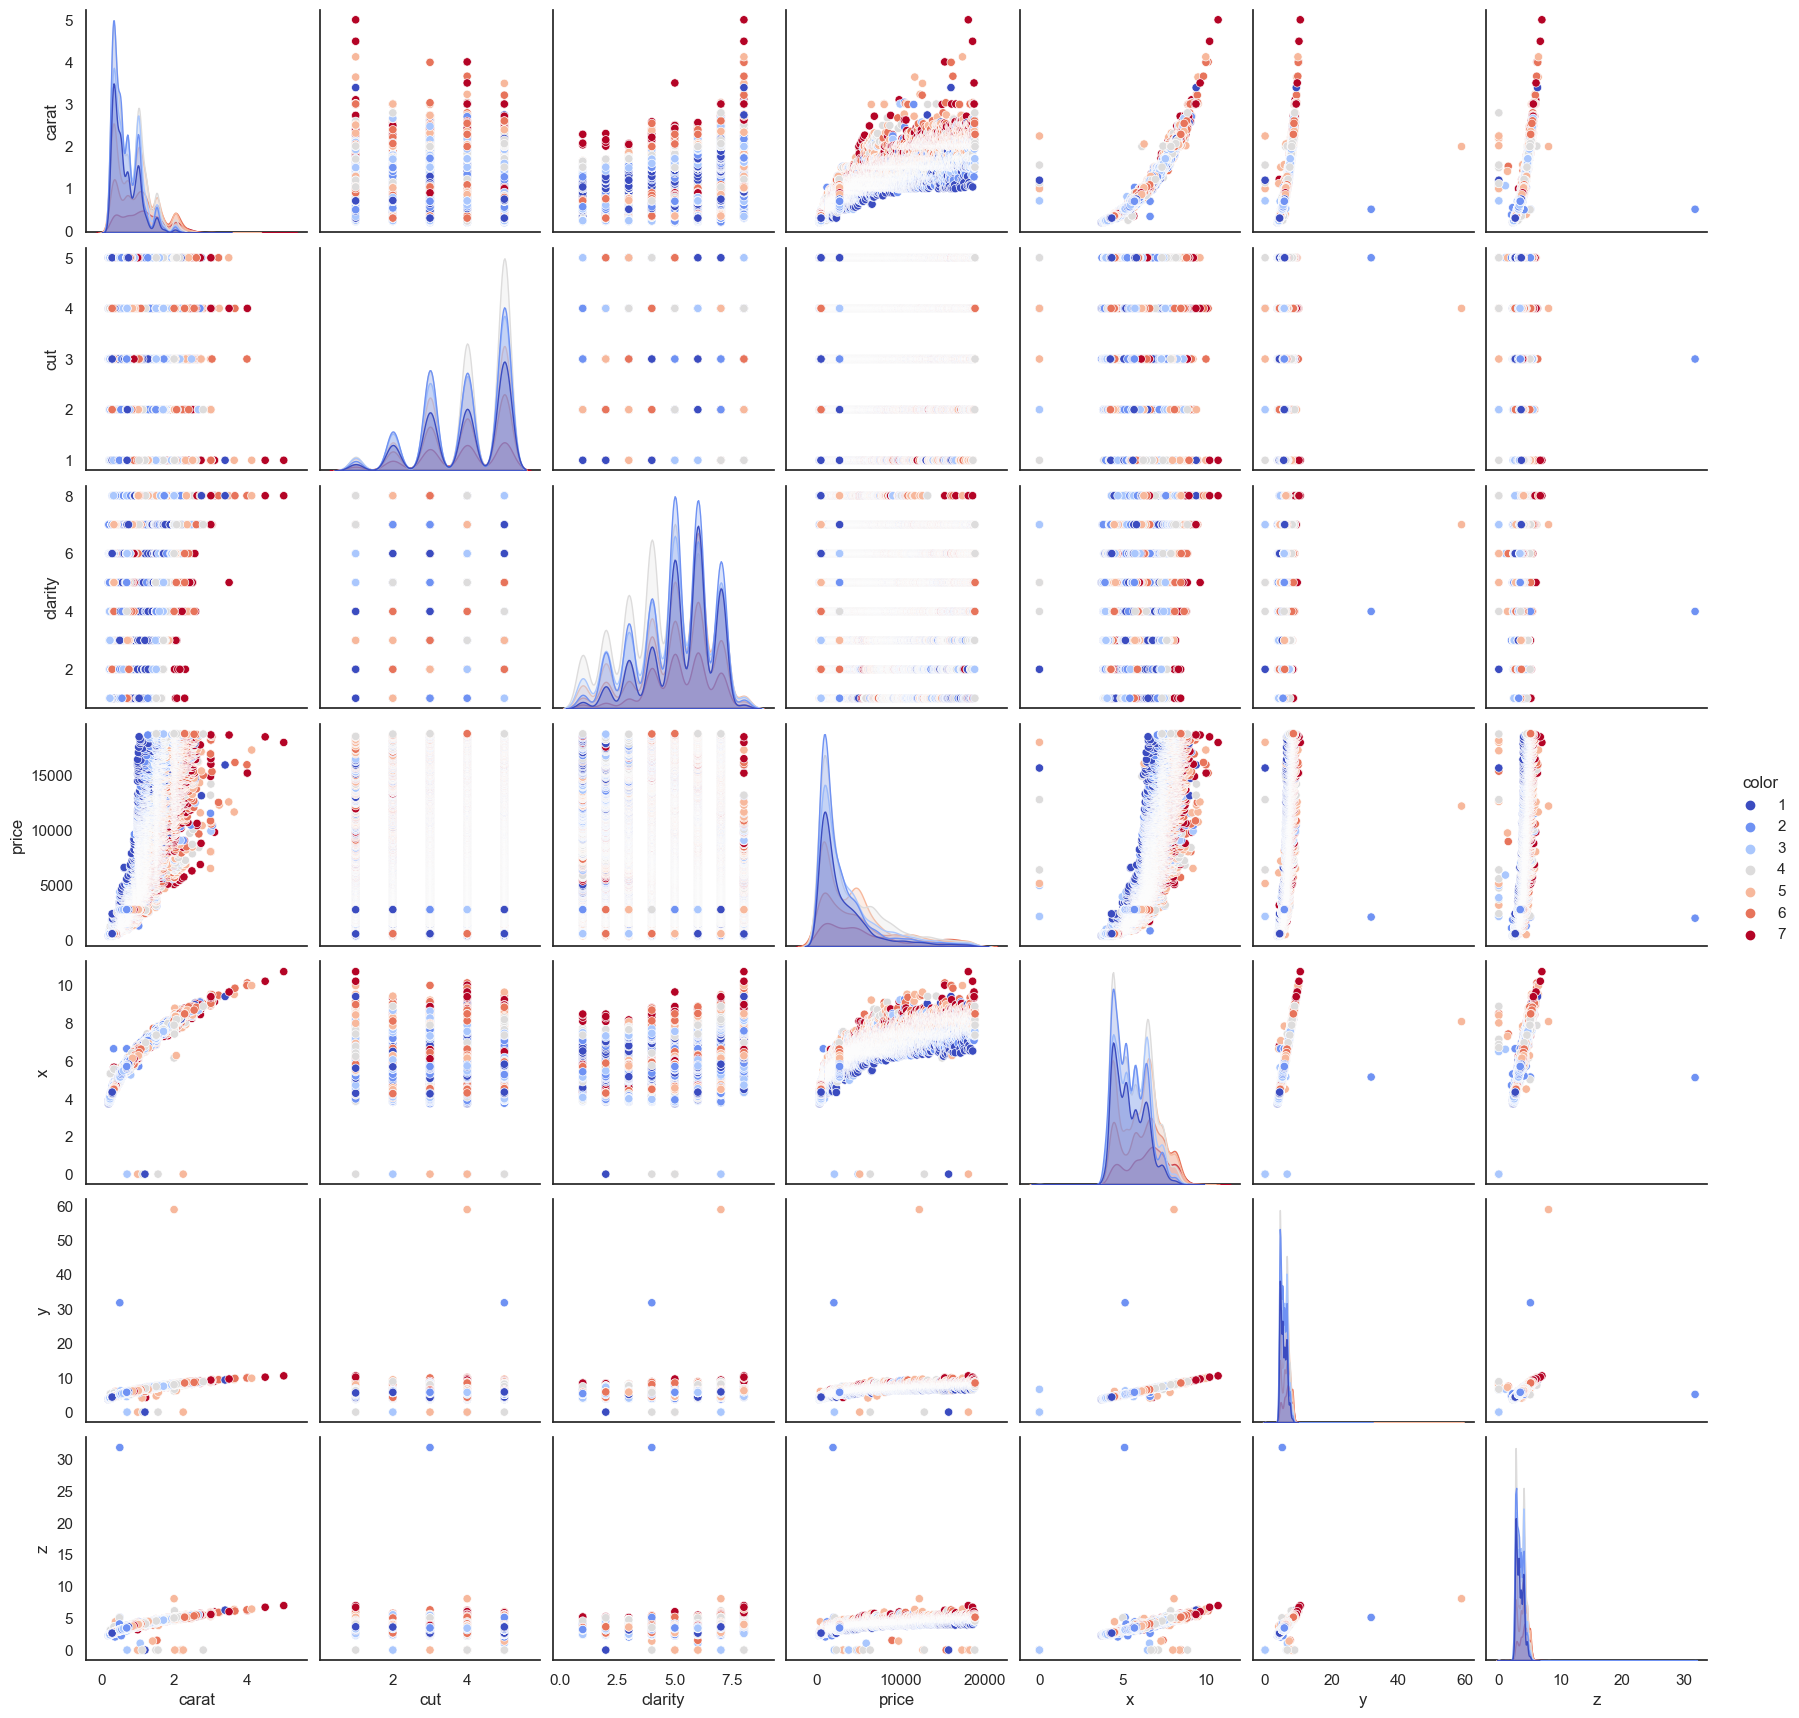

In [15]:
sns.pairplot(dfCleaned, hue='color', palette='coolwarm')

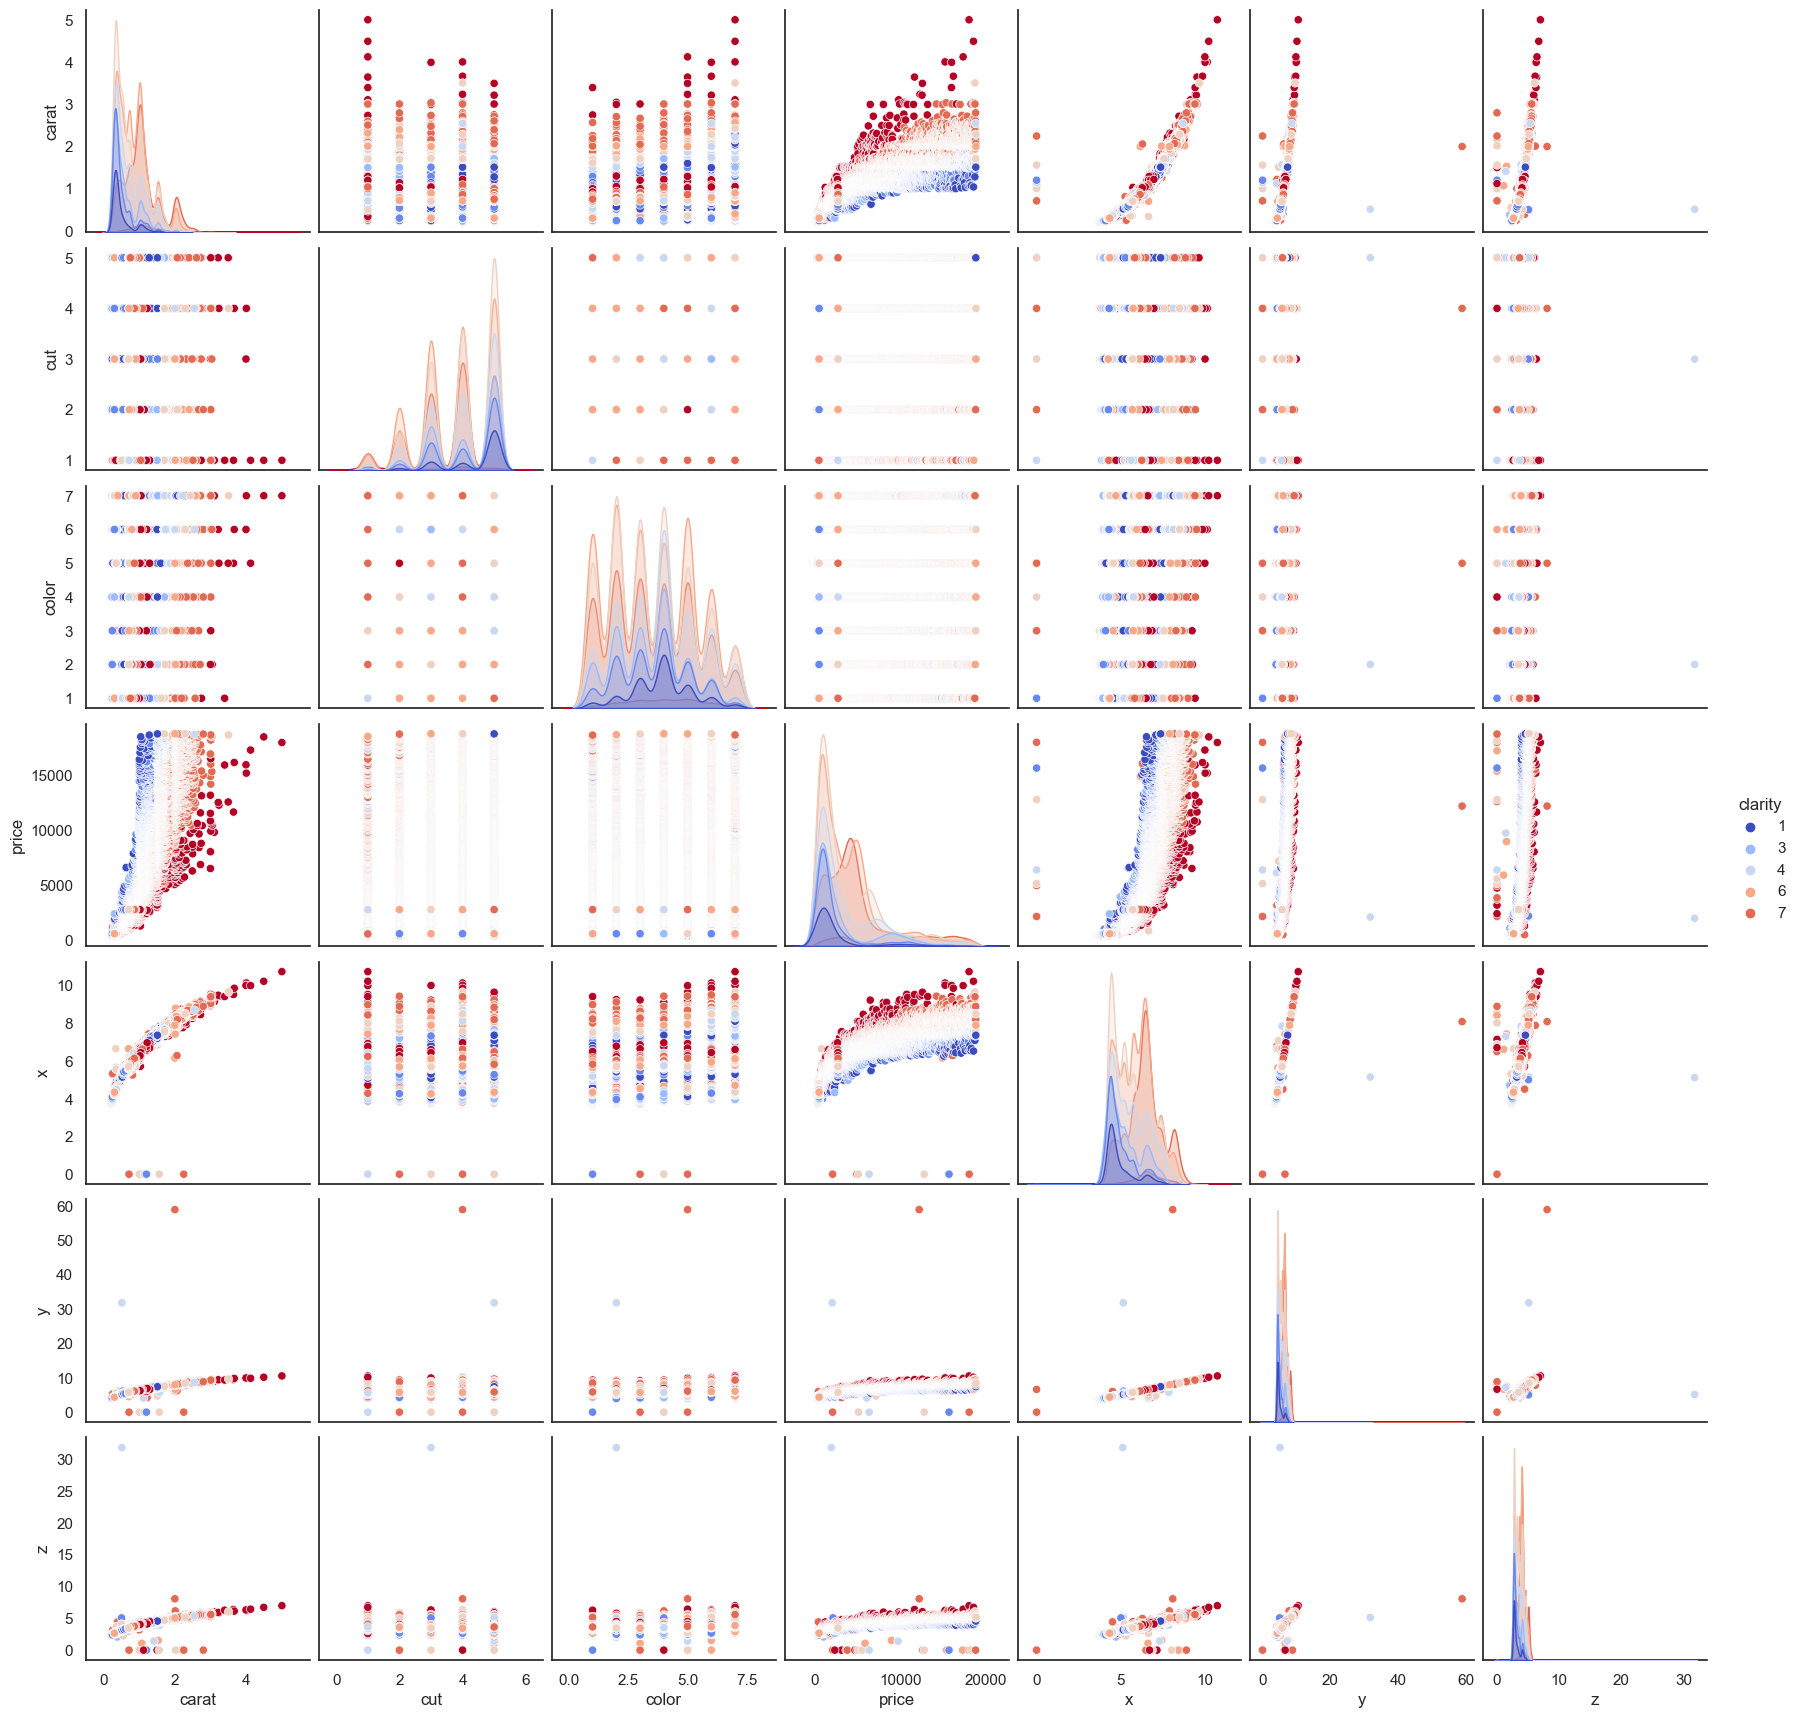

In [16]:
sns.pairplot(dfCleaned, hue='clarity', palette='coolwarm')

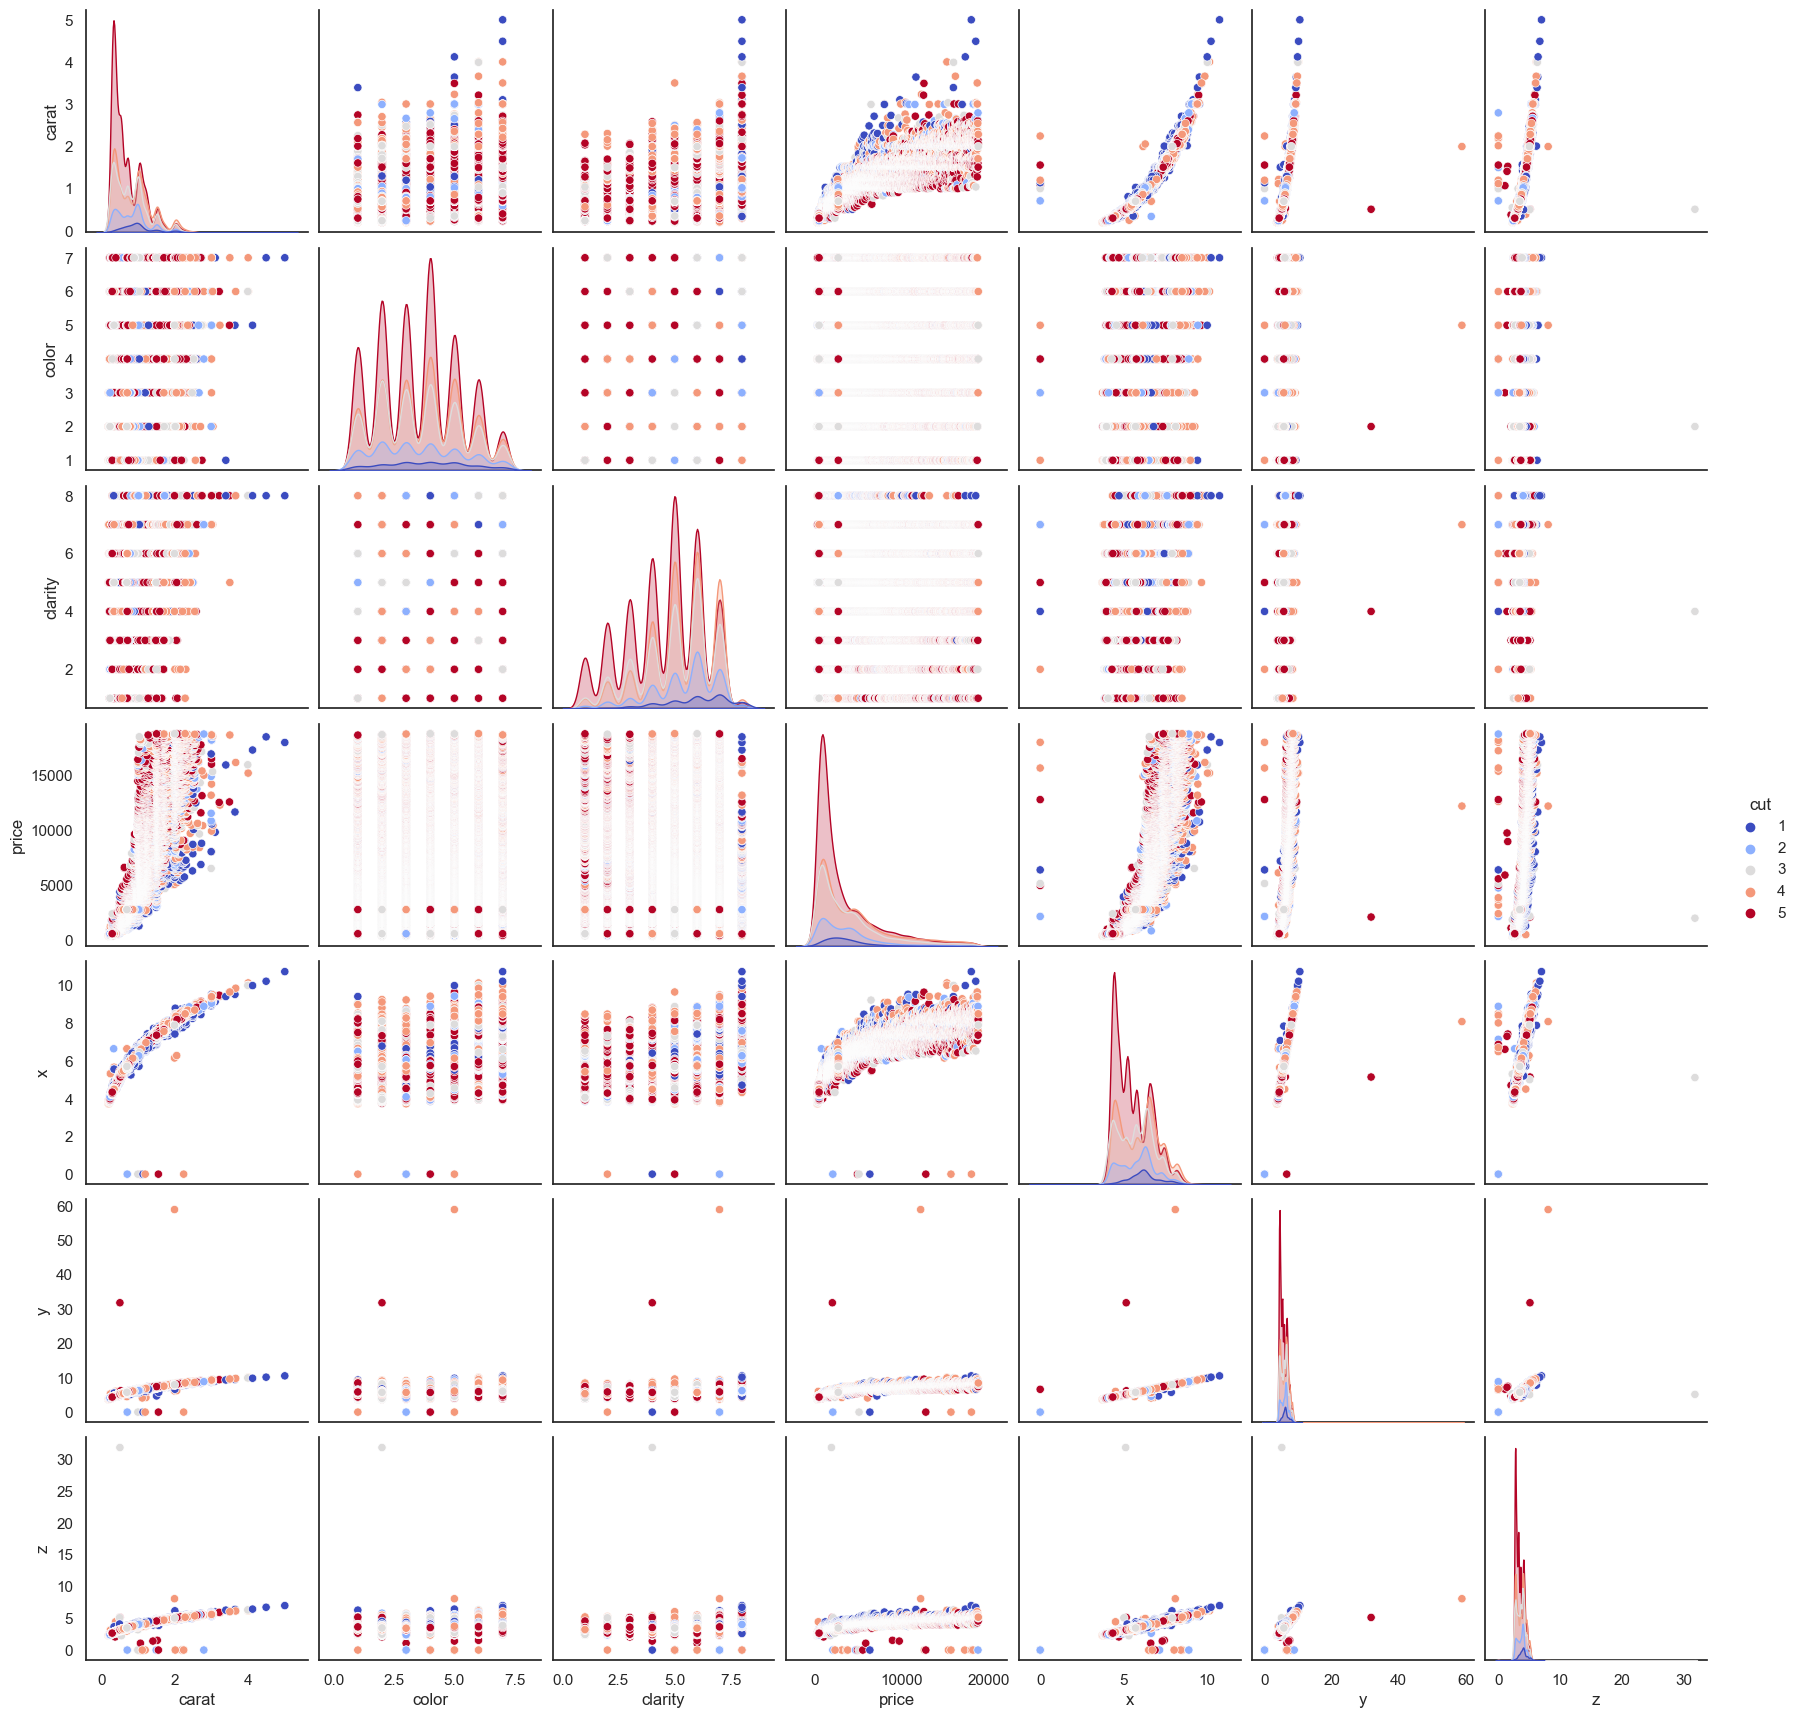

In [17]:
sns.pairplot(dfCleaned, hue='cut', palette='coolwarm')

* If we consider the features color, clarity and cut
* We can predict that the fauture clarity has data more concentrated in spots
* So we can try to use a clustering algorithm to predict the clarity of the diamonds

## K-Means Clustering
* Make round clusters
* Not good if data is not organized in round clusters
* So not good for this dataset

/Users/petercatania/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1.11647036e+00 3.72295050e+00 3.91169373e+00 5.78539366e+03
  6.61857497e+00 6.61483663e+00 4.08817779e+00]
 [1.71765154e+00 3.89507267e+00 4.15349167e+00 1.33535128e+04
  7.63558313e+00 7.63718362e+00 4.70037398e+00]
 [4.92391410e-01 3.98986896e+00 3.35070371e+00 1.45885483e+03
  4.99251668e+00 4.99949284e+00 3.08438941e+00]]
[2 2 2 ... 2 2 2]


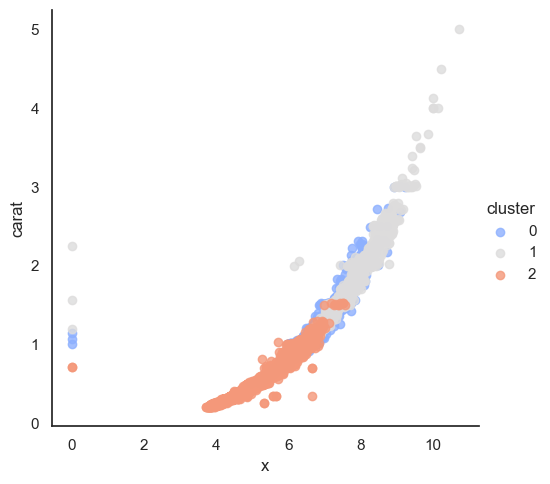

In [18]:
# Clustering with K-Means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(dfCleaned.drop('clarity', axis=1))

# view the cluster centeroids
print(kmeans.cluster_centers_)

# view the labels
print(kmeans.labels_)

# add a new column to the dataframe with the cluster labels
dfCleaned['cluster'] = kmeans.labels_

# plot the clusters
sns.lmplot(x='x', y='carat', data=dfCleaned, hue='cluster', palette='coolwarm', aspect=1, fit_reg=False)


/Users/petercatania/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: title={'center': 'Original'}, xlabel='x', ylabel='carat'>

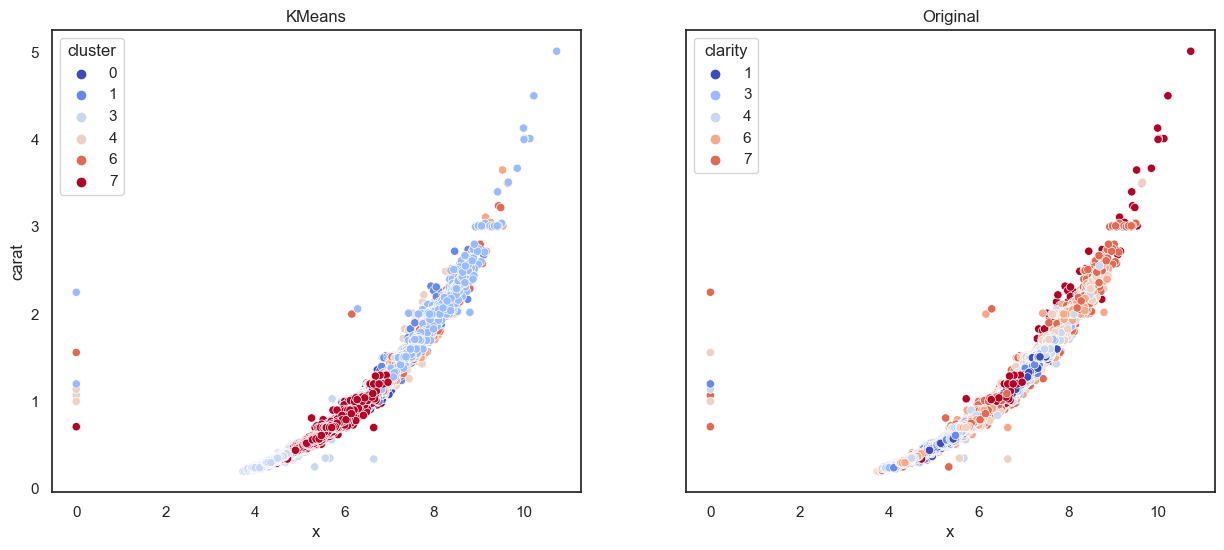

In [19]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(dfCleaned.drop('clarity', axis=1))

# add a new column to the dataframe with the cluster labels
dfCleaned['cluster'] = kmeans.labels_

# side by side plots of the clusters and the original data
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
ax1.set_title('KMeans')
sns.scatterplot(x='x', y='carat', data=dfCleaned, hue='cluster', palette='coolwarm', ax=ax1)

ax2.set_title("Original")
sns.scatterplot(x='x', y='carat', data=dfCleaned, hue='clarity', palette='coolwarm', ax=ax2)

* We can clearly see that the clusters are not round, so the K-Means algorithm is not good for this dataset

## Agglomerative Clustering

In [20]:
# Clustering models: K-Means, Hierarchical Clustering, DBSCAN, Gaussian Mixture Model (GMM), Mean Shift, Spectral Clustering, Affinity Propagation,
# Agglomerative Clustering, Birch, Mini-Batch K-Means, OPTICS, and more.
# Clastering with Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=8)
agg.fit(dfCleaned.drop('clarity', axis=1))

# view the labels
print(agg.labels_)
# add a new column to the dataframe with the cluster labels
dfCleaned['cluster'] = agg.labels_


[5 5 5 ... 0 0 0]


<Axes: title={'center': 'Original'}, xlabel='price', ylabel='carat'>

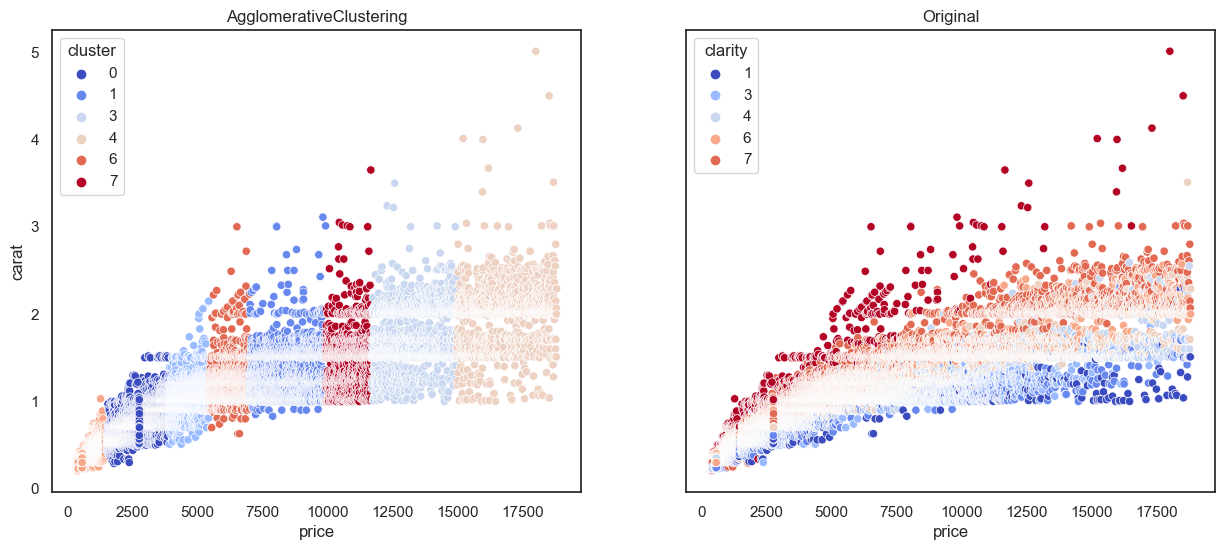

In [22]:
# side by side plots of the clusters and the original data
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
ax1.set_title('AgglomerativeClustering')
sns.scatterplot(x='price', y='carat', data=dfCleaned, hue='cluster', palette='coolwarm', ax=ax1)

ax2.set_title("Original")
sns.scatterplot(x='price', y='carat', data=dfCleaned, hue='clarity', palette='coolwarm', ax=ax2)


## DBSCAN Clustering

In [39]:
# Clustering with Mini-Batch K-Means
from sklearn.cluster import SpectralClustering

mbk = SpectralClustering(n_clusters=8)
mbk.fit(dfCleaned.drop('clarity', axis=1))

# view the labels
print(mbk.labels_)
# add a new column to the dataframe with the cluster labels
dfCleaned['cluster'] = mbk.labels_


/Users/petercatania/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


KeyboardInterrupt: 

<Axes: title={'center': 'Original'}, xlabel='price', ylabel='carat'>

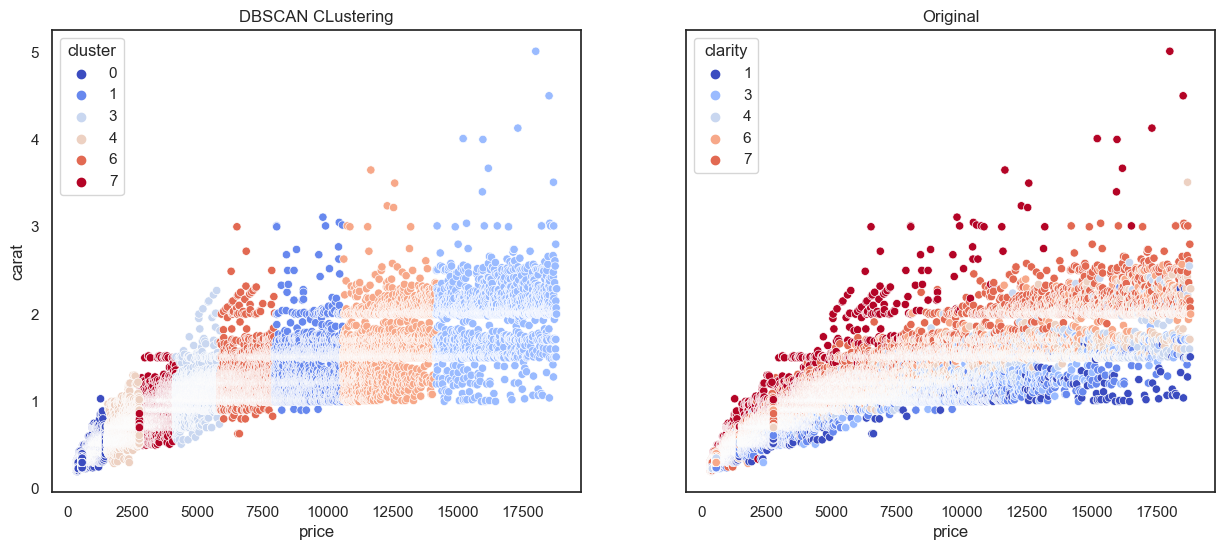

In [37]:
# side by side plots of the clusters and the original data
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
ax1.set_title('DBSCAN CLustering')
sns.scatterplot(x='price', y='carat', data=dfCleaned, hue='cluster', palette='coolwarm', ax=ax1)

ax2.set_title("Original")
sns.scatterplot(x='price', y='carat', data=dfCleaned, hue='clarity', palette='coolwarm', ax=ax2)

In [40]:
import umap

/Users/petercatania/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [99]:
# create a UMAP model with 2 dimensions
# n_neighbors default is 15
umapModel = umap.UMAP(n_components=2, n_neighbors=5, random_state=42, min_dist=0.1)

# fit the model to the data
manifold = umapModel.fit(dfCleaned.drop('clarity', axis=1))

/Users/petercatania/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


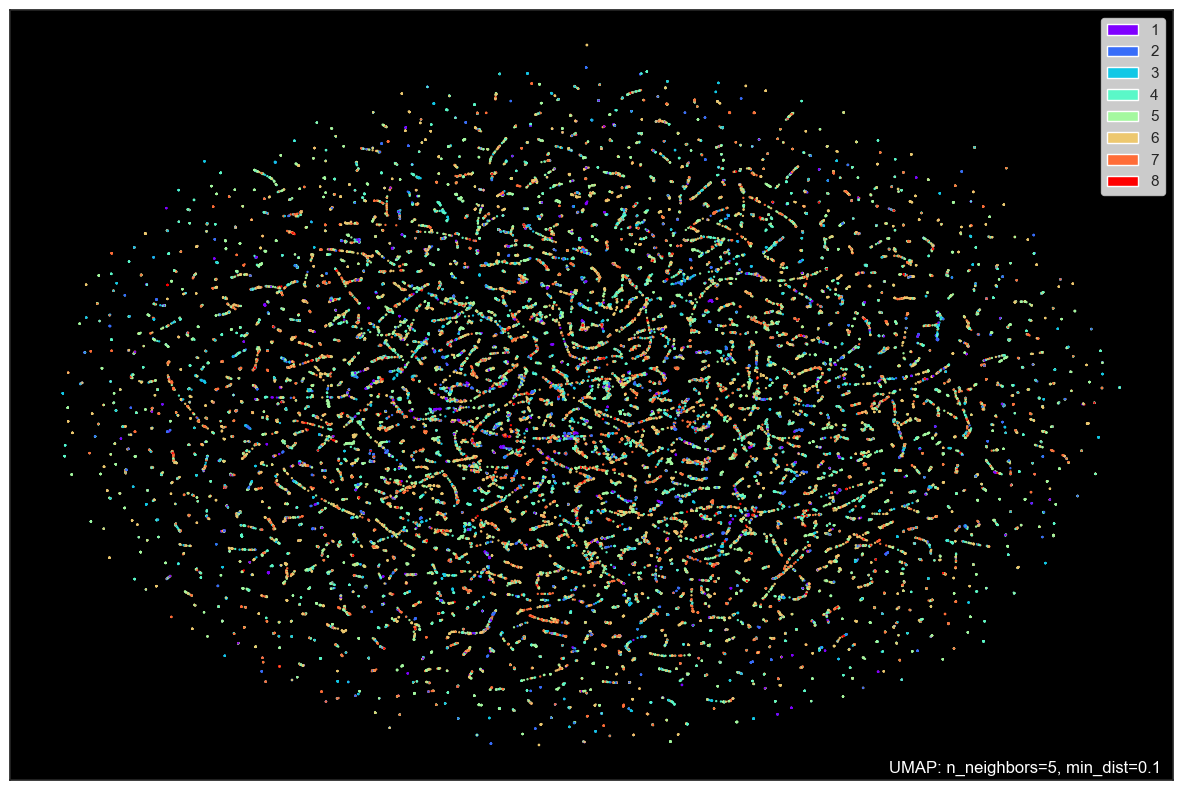

In [102]:
#! pip install pandas matplotlib datashader bokeh holoviews colorcet scikit-image  #pip
#! pip install umap-learn[plot]
import umap.plot  

y = dfCleaned['clarity'].values.flatten()

# plot the UMAP model with the colors genereated by the UMAP model
umap.plot.points(manifold, labels=y, theme="fire", width=1500, height=1000);

# Image size of 636x251086 pixels is too large. It must be less than 2^16 in each direction.
# plot the UMAP model with the colors genereated by the UMAP model




/Users/petercatania/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/petercatania/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/petercatania/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/petercatania/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/petercatania/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully con

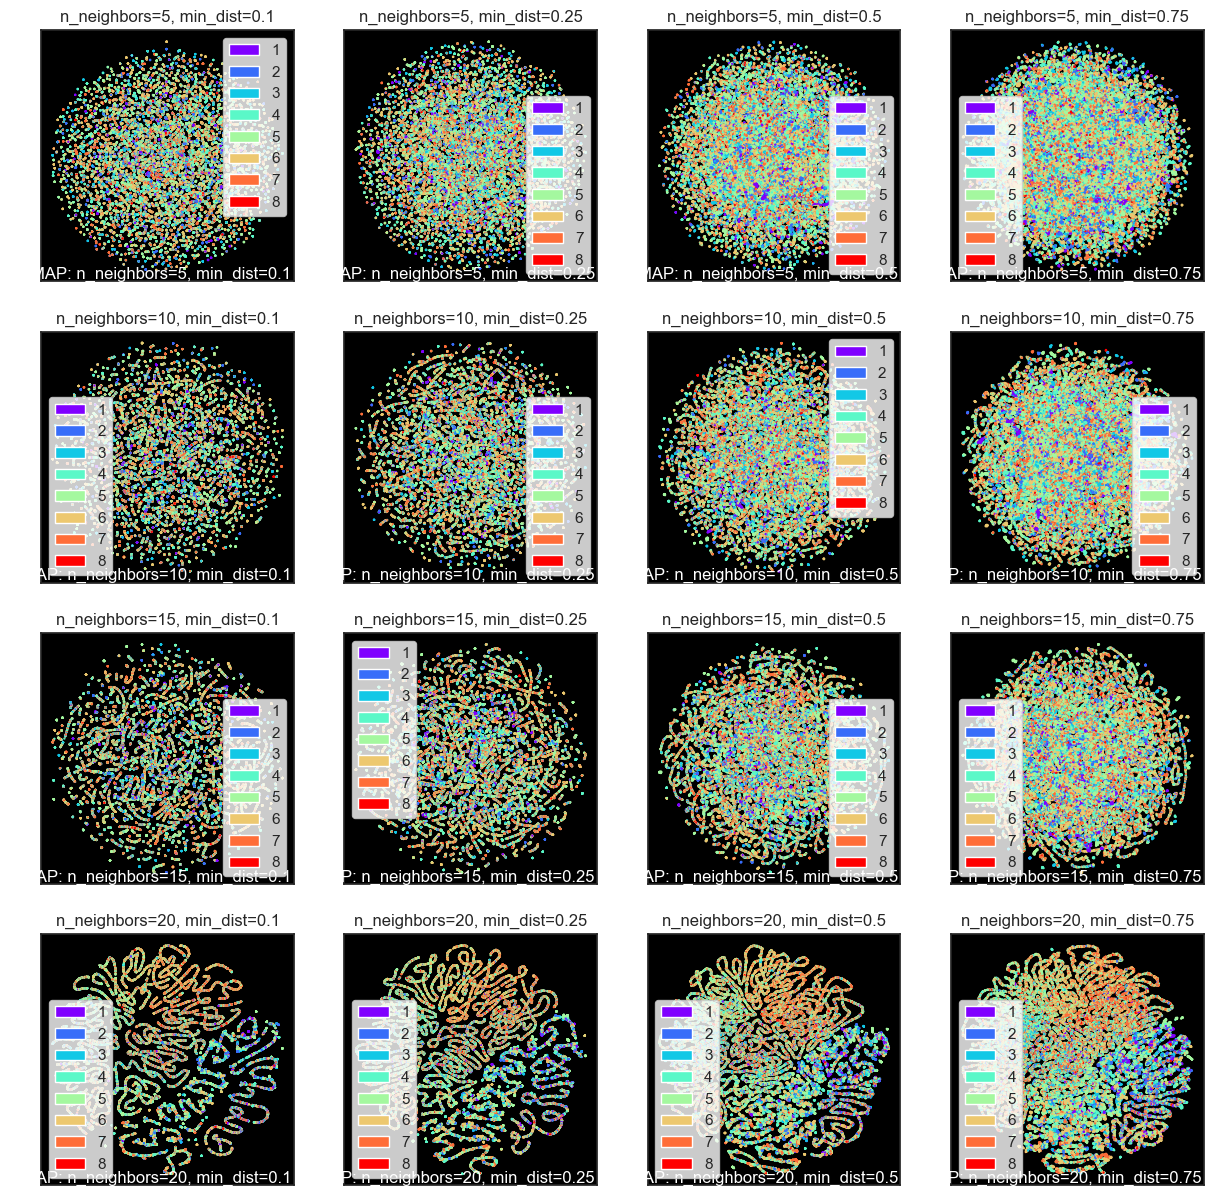

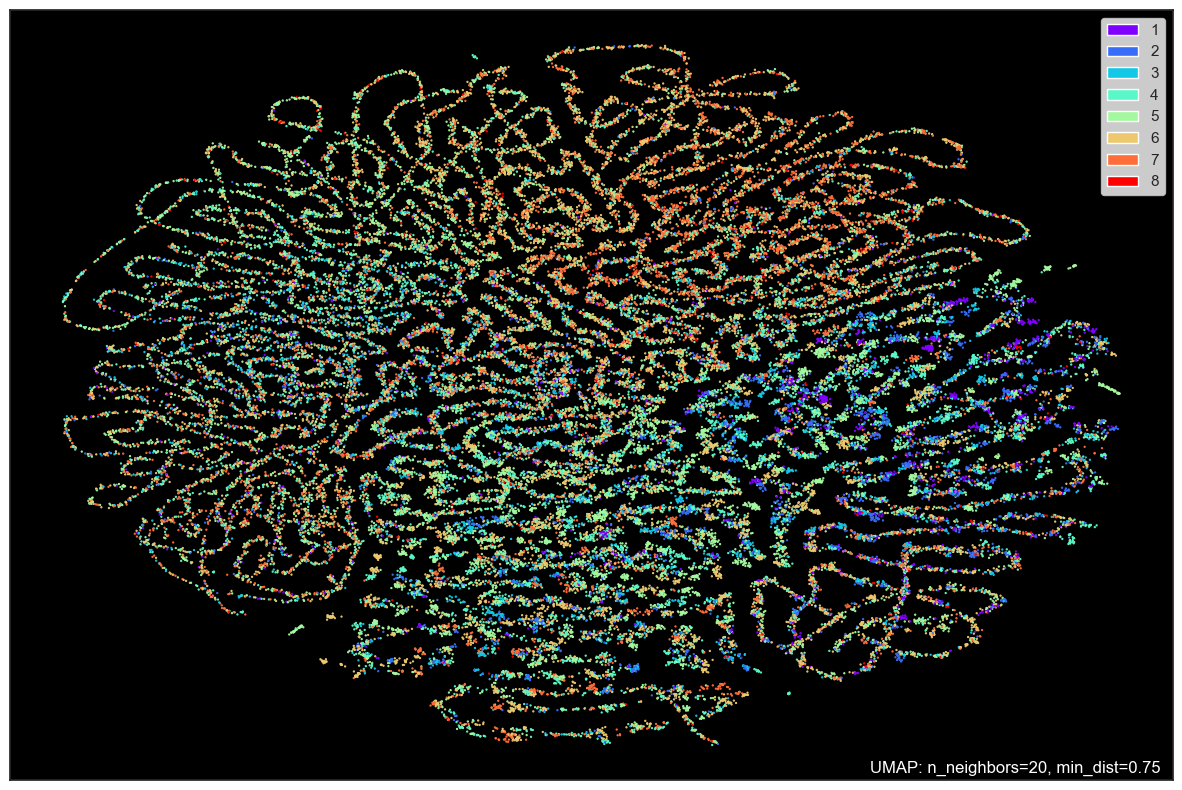

In [105]:
# plot different UMAP models with different parameters
fig, ax_array = plt.subplots(4, 4, figsize=(15, 15))
a = 0
b = 0
for n in [5, 10, 15, 20]:
    for d in [0.1, 0.25, 0.5, 0.75]:
        umapModel = umap.UMAP(n_components=2, n_neighbors=n, random_state=42, min_dist=d)
        manifold = umapModel.fit(dfCleaned.drop('clarity', axis=1))
        umap.plot.points(manifold, labels=y, theme="fire", width=1500, height=1000, ax=ax_array[a, b])
        ax_array[a, b].set_title(f"n_neighbors={n}, min_dist={d}")
        b += 1
    a += 1
    b = 0

# plot the UMAP model with the colors genereated by the UMAP model
umap.plot.points(manifold, labels=y, theme="fire", width=1500, height=1000);

